# **Topic: 7 Regression**
**Course Code: CSST104**

**Name: Simon B. Sancon**

**Section: BSCS-3B**

# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sne
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#**1. Load the Dataset:**


In [ ]:
netflix_data = pd.read_csv("Netflix_Userbase.csv")
netflix_data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# **2. Missing Values:**

In [ ]:
netflix_data_missing = netflix_data.isnull().sum()
print(netflix_data_missing)

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


# **3. Encode Categorical Variables**

In [ ]:
random_feedback = np.random.choice(["Positive", "Negative"], size=len(netflix_data))
netflix_data['Feedback'] = random_feedback

netflix_dummies = pd.get_dummies(netflix_data, drop_first=True)

print(netflix_dummies.head(5))

   User ID  Monthly Revenue  Age  Subscription Type_Premium  \
0        1               10   28                          0   
1        2               15   35                          1   
2        3               12   42                          0   
3        4               12   51                          0   
4        5               10   33                          0   

   Subscription Type_Standard  Join Date_01-05-23  Join Date_01-06-22  \
0                           0                   0                   0   
1                           0                   0                   0   
2                           1                   0                   0   
3                           1                   0                   0   
4                           0                   1                   0   

   Join Date_01-07-22  Join Date_01-08-22  Join Date_01-09-22  ...  \
0                   0                   0                   0  ...   
1                   0                   0 

# **4. Feature Selection**

In [ ]:
netflix_nodate = netflix_data.drop(["Join Date", "Last Payment Date"], axis=1)
x_dummies = pd.get_dummies(netflix_nodate, drop_first=True)

linear_data_x = x_dummies.drop(["Feedback_Positive"], axis = 1)
linear_data_y = netflix_data["Monthly Revenue"]

logistic_data_x = x_dummies.drop(["Feedback_Positive", "Monthly Revenue", "User ID"], axis = 1)
logistic_data_y = netflix_dummies["Feedback_Positive"]

print(netflix_dummies.columns)
print(x_dummies.columns)


Index(['User ID', 'Monthly Revenue', 'Age', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Join Date_01-05-23',
       'Join Date_01-06-22', 'Join Date_01-07-22', 'Join Date_01-08-22',
       'Join Date_01-09-22',
       ...
       'Country_Italy', 'Country_Mexico', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States', 'Gender_Male',
       'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet',
       'Feedback_Positive'],
      dtype='object', length=343)
Index(['User ID', 'Monthly Revenue', 'Age', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Country_Brazil', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_Italy', 'Country_Mexico',
       'Country_Spain', 'Country_United Kingdom', 'Country_United States',
       'Gender_Male', 'Device_Smart TV', 'Device_Smartphone', 'Device_Tablet',
       'Feedback_Positive'],
      dtype='object')


# **Part 2: Exploratory Data Analysis(EDA)**

# **1. Descriptive Statistics:**

In [ ]:
netflix_stat = netflix_data.describe()
print(netflix_stat)

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


# **2. Visualizations**

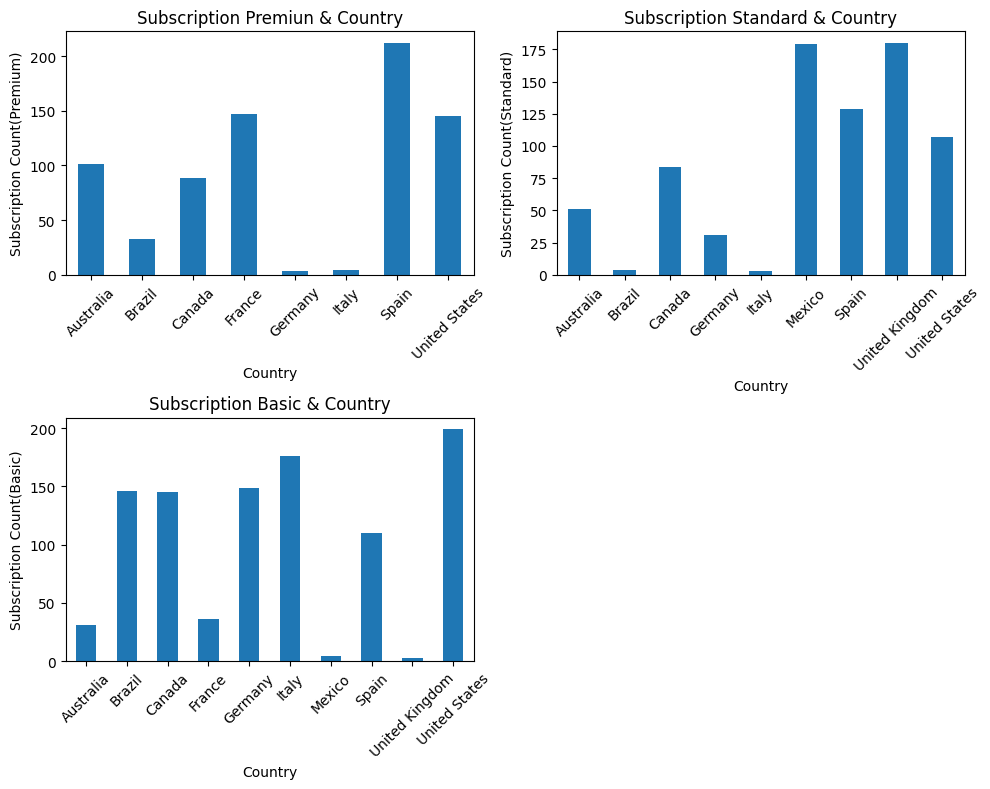

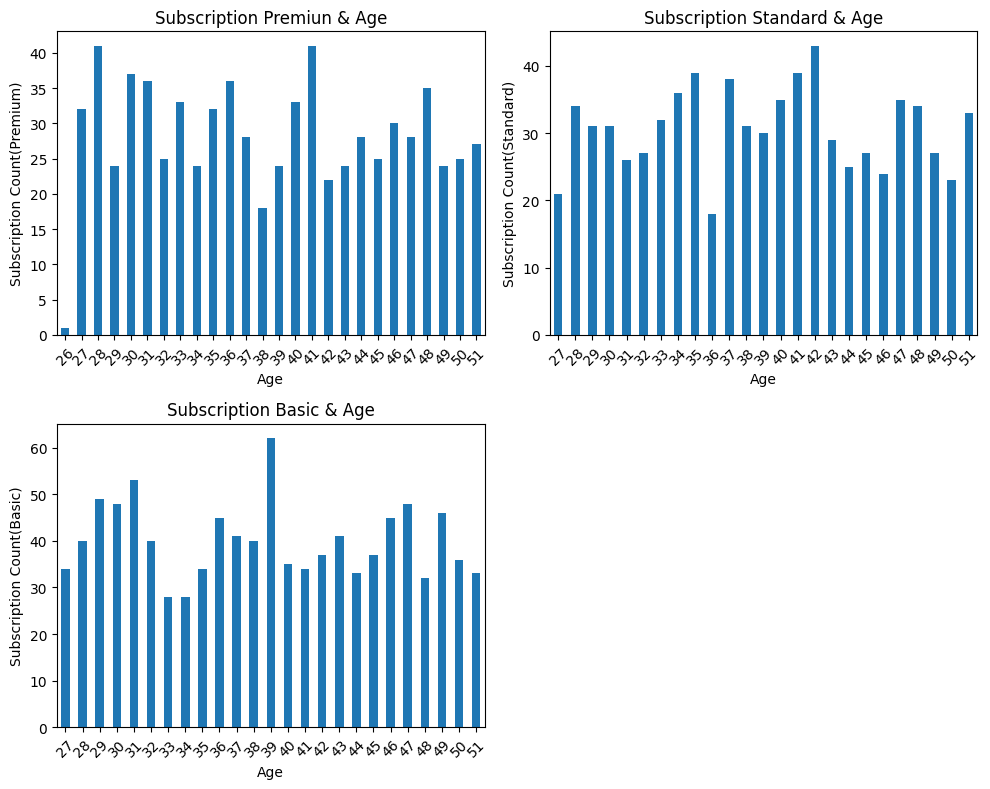

<Axes: >

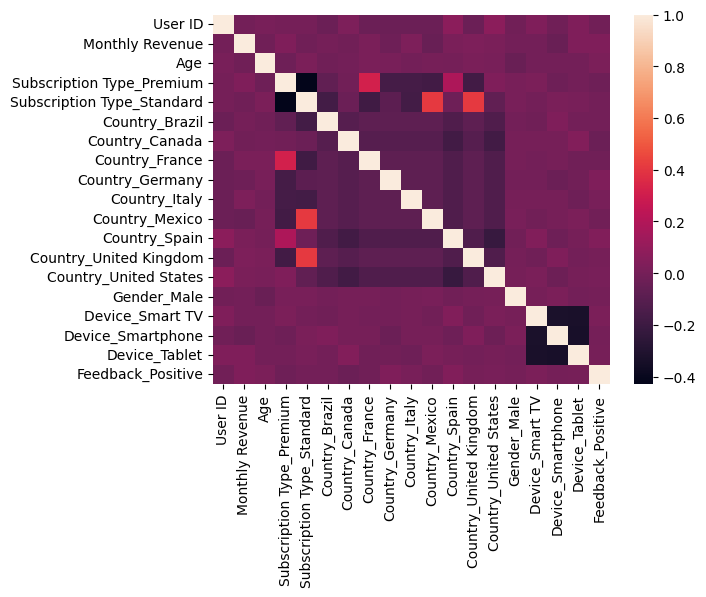

In [ ]:
plt.subplot(2, 2, 1)
subtype_country_premium = netflix_data[netflix_data["Subscription Type"] == "Premium"].groupby("Country").size()
subtype_country_premium.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Country")
plt.ylabel("Subscription Count(Premium)")
plt.title("Subscription Premiun & Country")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 2)
subtype_country_standard = netflix_data[netflix_data["Subscription Type"] == "Standard"].groupby("Country").size()
subtype_country_standard.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Country")
plt.ylabel("Subscription Count(Standard)")
plt.title("Subscription Standard & Country")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 3)
subtype_country_basic = netflix_data[netflix_data["Subscription Type"] == "Basic"].groupby("Country").size()
subtype_country_basic.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Country")
plt.ylabel("Subscription Count(Basic)")
plt.title("Subscription Basic & Country")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

plt.subplot(2, 2, 1)
subtype_age_premium = netflix_data[netflix_data["Subscription Type"] == "Premium"].groupby("Age").size()
subtype_age_premium.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Subscription Count(Premium)")
plt.title("Subscription Premiun & Age")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 2)
subtype_age_standard = netflix_data[netflix_data["Subscription Type"] == "Standard"].groupby("Age").size()
subtype_age_standard.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Subscription Count(Standard)")
plt.title("Subscription Standard & Age")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 3)
subtype_age_basic = netflix_data[netflix_data["Subscription Type"] == "Basic"].groupby("Age").size()
subtype_age_basic.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Subscription Count(Basic)")
plt.title("Subscription Basic & Age")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

sne.heatmap(x_dummies.corr())


# **Part 3: Build the Linear Regression(Predicting Mothly Revenue)**

# **1. Build the Model:**

**1.1 Splitting the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(linear_data_x, linear_data_y, test_size=0.2, random_state=42)


**1.2 Initializing the Model**

In [ ]:
model = LinearRegression()

**1.3 Fitting the Model**

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

**1.4 Making Predicions**

In [ ]:
revenue_predict = model.predict(x_test)
print(x_test)
print(revenue_predict)

      User ID  Monthly Revenue  Age  Subscription Type_Premium  \
1447     1448               14   33                          0   
1114     1115               14   33                          0   
1064     1065               15   33                          0   
2287     2288               13   50                          0   
1537     1538               10   44                          0   
...       ...              ...  ...                        ...   
2375     2376               12   49                          1   
1609     1610               14   36                          0   
596       597               13   50                          0   
84         85               10   37                          1   
2213     2214               12   29                          1   

      Subscription Type_Standard  Country_Brazil  Country_Canada  \
1447                           1               0               0   
1114                           0               0               0   
106

# **2. Model Evaluation**

In [ ]:
r_squared = r2_score(y_test, revenue_predict)
print("R_Squared Value", r_squared)

mse= mean_squared_error(y_test,revenue_predict)
print("Mean Squared Error", mse)


R_Squared Value 1.0
Mean Squared Error 2.19555767141112e-28


# **Part 4: Logistic Regression (Predicting Customer Feedback)**

# **1. Model Building**

**1.1 Splitting the Dataset**

In [ ]:
lx_train, lx_test, ly_train, ly_test = train_test_split(logistic_data_x, logistic_data_y,test_size=0.2, random_state=42)

**1.2 Standardize the Features**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(lx_train)
x_test_scaled = scaler.transform(lx_test)

**1.3 Train the Logistic Regression Model**

In [ ]:
lmodel = LogisticRegression()
lmodel.fit(x_train_scaled,ly_train)

LogisticRegression()

**1.4 Prediction on the test set**

In [ ]:
ly_pred = lmodel.predict(x_test_scaled)
print(ly_pred)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 

# **2. Evaluation**

In [ ]:
accuracy = accuracy_score(ly_test, ly_pred)
conf_matrix = confusion_matrix(ly_test, ly_pred)
class_report = classification_report(ly_test, ly_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.516
Confusion Matrix: 
[[177  75]
 [167  81]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.51      0.70      0.59       252
           1       0.52      0.33      0.40       248

    accuracy                           0.52       500
   macro avg       0.52      0.51      0.50       500
weighted avg       0.52      0.52      0.50       500



# **Part 5: Comparative Analysis and Visualization**

# **1. Feature Importance**

**1.1. Feature Importance Linear**

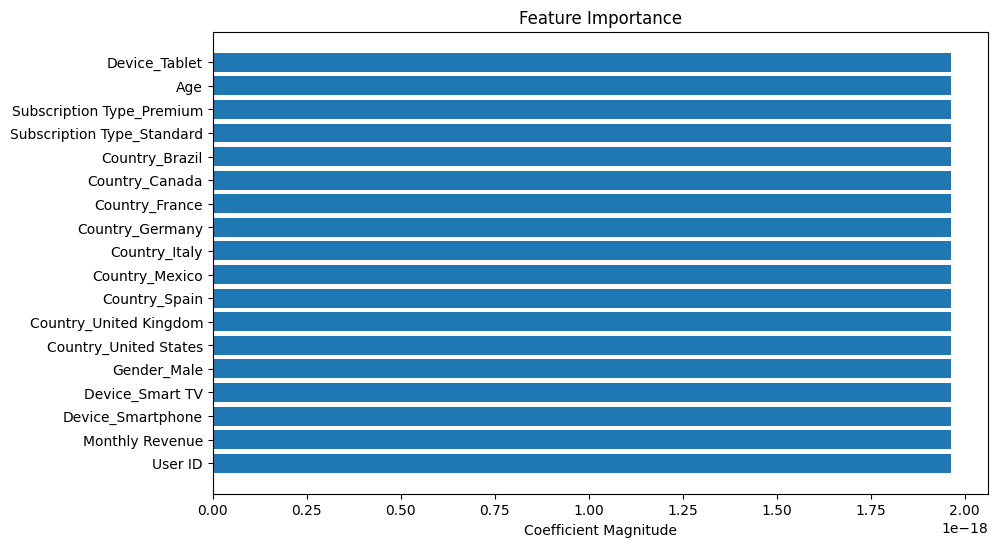

In [ ]:
feature_importance_linear = pd.DataFrame(abs(model.coef_[0]), index= linear_data_x.columns, columns=["Coefficient"])
feature_importance_linear = feature_importance_linear.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_linear.index, feature_importance_linear["Coefficient"])
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance")
plt.show()

**1.2 Feature Importance Logistic**

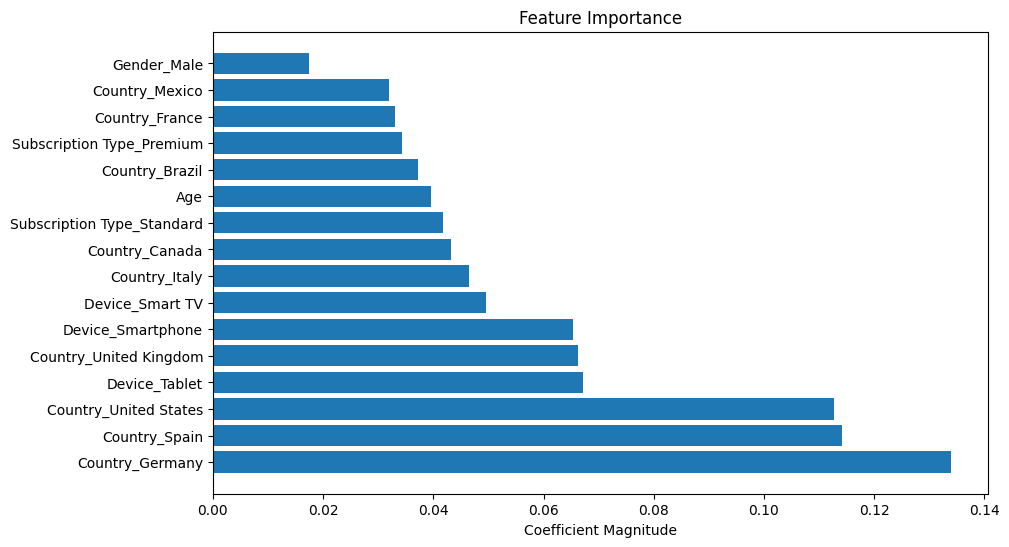

In [ ]:
feature_importance_logistic = pd.DataFrame(abs(lmodel.coef_[0]), index= logistic_data_x.columns, columns=["Coefficient"])
feature_importance_logistic = feature_importance_logistic.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_logistic.index, feature_importance_logistic["Coefficient"])
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance")
plt.show()

# **2. Insights**

In [ ]:
print("""
Considering the elements are not fit for a
linear regression prediction for it is lacking
enough numerical variables, it displays a good
performance. though the feature performance does
not quite justify it.

on the other hand the logistic regression
performed quite well, although the presented
accuracu and other parameters displayed above
50% accuracy, it is arguably a good performance
considering the feedback are only randomize
""")


Considering the elements are not fit for a
linear regression prediction for it is lacking 
enough numerical variables, it displays a good
performance. though the feature performance does
not quite justify it.

on the other hand the logistic regression
performed quite well, although the presented
accuracu and other parameters displayed above
50% accuracy, it is arguably a good performance
considering the feedback are only randomize

